In [ ]:
# 학습용 데이터셋
import pandas as pd

train = pd.read_csv("train.csv")

print(type(train))
train

<class 'pandas.core.frame.DataFrame'>


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,197.0,4,3.50,2.092344,85.0,0,44.2,5,85.0,5.71,85.0,0.4,11.147277,5171734.0,2.2,2.1,0.577,10.7,75.0
1,73.0,0,1.83,91.139718,97.0,0,22.1,0,97.0,7.93,96.0,0.1,633.794980,367.0,14.0,14.1,0.653,11.6,76.7
2,267.0,5,7.99,29.381727,96.0,42724,56.8,6,99.0,6.39,98.0,0.8,233.188310,4678775.0,2.6,2.7,0.716,14.7,67.7
3,86.0,0,12.10,5316.877456,83.0,15,52.2,0,83.0,1.56,83.0,0.1,36693.426200,8171966.0,1.7,1.9,0.841,14.7,79.3
4,157.0,6,6.05,587.882823,8.0,0,52.6,8,85.0,4.41,82.0,1.2,4952.677530,9767758.0,3.4,3.3,0.695,12.9,73.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,163.0,0,10.21,1356.022164,9.0,3,59.8,0,91.0,5.91,91.0,0.1,13822.855900,234319.0,2.2,2.2,0.812,15.5,73.8
1315,212.0,5,8.39,375.683538,48.0,39,58.5,6,57.0,7.81,52.0,0.2,2965.142365,45877.0,2.4,2.5,0.728,14.9,69.8
1316,289.0,177,1.13,38.557833,52.0,3511,14.9,270,63.0,4.28,54.0,2.4,325.382554,83184892.0,11.2,1.9,0.378,7.6,59.8
1317,154.0,54,7.52,1111.191325,96.0,68,52.0,61,99.0,8.27,99.0,0.1,11224.154800,196796269.0,2.9,2.9,0.716,13.8,73.8


In [ ]:
# train.head(3)
train.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [ ]:
x = train[train.columns[:18]]
y = train['Life expectancy ']

print(type(x))
print(type(y))

print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1319, 18)
(1319,)


In [ ]:
x = x.to_numpy()
y = y.to_numpy()

print(type(x))
print(type(y))

print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1319, 18)
(1319,)
(1319, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(989, 18) (989, 1)
(330, 18) (330, 1)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 변환기 클래스

poly.fit(x_train) # (x1, x2, x3) --> (x1^2, x2^2, x3^2, x1*x2, x1*x3, x2*x3)
x_train_poly = poly.transform(x_train)

print(x_train_poly.shape)
#print(x_train_poly)

x_test_poly = poly.transform(x_test)
print(x_test_poly.shape)

(989, 189)
(330, 189)


In [ ]:
poly.degree # 최고 차항의 차수

2

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8',
       'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14',
       'x0 x15', 'x0 x16', 'x0 x17', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4',
       'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11',
       'x1 x12', 'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x1 x17', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9',
       'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x2 x15',
       'x2 x16', 'x2 x17', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7',
       'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14',
       'x3 x15', 'x3 x16', 'x3 x17', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7',
       'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14',
       'x4 x15', 'x4 x16', 'x4 x17', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_poly, y_train) # 계수, 절편 값을 찾아라!

print("학습용:", lr.score(x_train_poly, y_train))
print("시험용:", lr.score(x_test_poly, y_test))

학습용: 0.8940802354701635
시험용: 0.44005359606082983


In [ ]:
'''
poly = PolynomialFeatures(include_bias=False, degree=3)

poly.fit(x_train)
x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

print(x_train_poly.shape)
print(x_test_poly.shape)
'''

(989, 1329)
(330, 1329)


In [ ]:
#poly.get_feature_names_out()

array(['x0', 'x1', 'x2', ..., 'x16^2 x17', 'x16 x17^2', 'x17^3'],
      dtype=object)

In [ ]:
'''
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # 계수, 절편 값을 찾아라!

# 과대적합 -> 수능 망함
print("학습용:", lr.score(x_train_poly, y_train))
print("시험용:", lr.score(x_test_poly, y_test))
'''

학습용: 0.36835386760147215
시험용: -6927.3328509458515


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train_poly) # mean, std 계산해줌

#print(ss.mean_)
#print(ss.scale_)

StandardScaler()

In [ ]:
# 표준 점수화 되어 z score가 됨
x_train_scaled = ss.transform(x_train_poly)
x_test_scaled = ss.transform(x_test_poly)

print(x_train_scaled.shape)
print(x_test_scaled.shape)

(989, 189)
(330, 189)


In [ ]:
# Ridge(릿지) -> 과대적합, 차원축소 회피 가능

from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(x_train_scaled, y_train)

print(x_train_scaled.shape)
print("학습용:", ridge.score(x_train_scaled, y_train))
print("시험용:", ridge.score(x_test_scaled, y_test))

(989, 189)
학습용: 0.93573995519507
시험용: 0.8574006289464082


In [ ]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for a in alpha:
    ridge = Ridge(alpha=a)

    ridge.fit(x_train_scaled, y_train)

    train_score.append(ridge.score(x_train_scaled, y_train))
    test_score.append(ridge.score(x_test_scaled, y_test))

print(train_score)
print(test_score)

[0.9412476075123702, 0.9407349979804331, 0.9394730422700942, 0.93573995519507, 0.9228283700091592, 0.8885459276317283]
[0.8056844870850044, 0.8101861210883424, 0.8406680099628362, 0.8574006289464082, 0.8714245148070314, 0.8432930231297088]


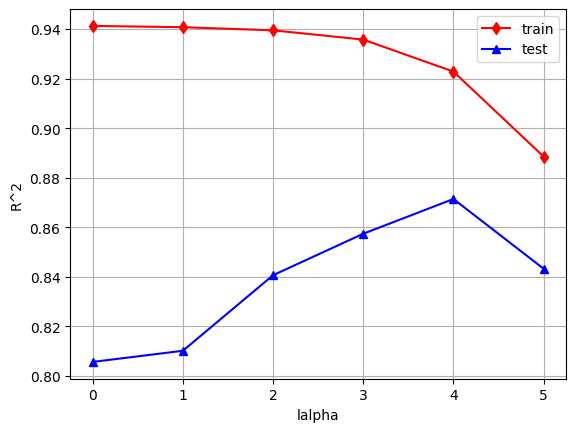

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_score, label="train", marker='d', color="red")
plt.plot(test_score, label="test", marker='^', color="blue")
plt.xlabel("lalpha")
plt.ylabel("R^2")
plt.grid()
plt.legend()
plt.show()

In [ ]:
ridge = Ridge(alpha=10)

ridge.fit(x_train_scaled, y_train)

print(x_train_scaled.shape)
print("학습용:", ridge.score(x_train_scaled, y_train))
print("시험용:", ridge.score(x_test_scaled, y_test))

(989, 189)
학습용: 0.9228283700091592
시험용: 0.8714245148070314


In [ ]:
# 학습용 데이터셋
import pandas as pd

test = pd.read_csv("test.csv")

print(type(test))
print(test.shape)
#print(test)

<class 'pandas.core.frame.DataFrame'>
(330, 18)


In [ ]:
test_poly = poly.transform(test)
print(test_poly.shape)

test_scaled = ss.transform(test_poly)
print(test_poly.shape)

(330, 189)
(330, 189)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [ ]:
y_pred = ridge.predict(test_scaled)

print(y_pred)

[[76.17211192]
 [59.71123185]
 [76.59783146]
 [75.27387412]
 [63.7179994 ]
 [71.43797956]
 [67.4290033 ]
 [57.34569985]
 [59.01705961]
 [62.20947325]
 [70.63998344]
 [55.85352143]
 [70.8219187 ]
 [72.84610983]
 [73.22083458]
 [70.93553348]
 [61.5161637 ]
 [79.19352042]
 [76.89906117]
 [83.40217119]
 [62.69800807]
 [55.80096416]
 [82.61834759]
 [71.49236507]
 [73.98878653]
 [81.42845703]
 [72.61448084]
 [74.48598176]
 [80.57917326]
 [79.95157212]
 [58.95124738]
 [64.94285002]
 [81.65837644]
 [79.07473902]
 [76.87049254]
 [74.18305944]
 [75.43692888]
 [70.01051666]
 [77.4796972 ]
 [74.32154206]
 [61.64266197]
 [71.97075028]
 [70.53563687]
 [72.52260315]
 [79.48303569]
 [72.11078166]
 [71.73544239]
 [74.49478048]
 [78.37722769]
 [71.50897497]
 [69.65464496]
 [73.85796277]
 [66.12948716]
 [72.18124198]
 [73.08463821]
 [69.16333222]
 [81.43431011]
 [71.97095498]
 [64.59590753]
 [64.61090328]
 [65.0236285 ]
 [74.56098389]
 [53.20160934]
 [72.86183144]
 [71.14717379]
 [81.61827137]
 [55.24314

In [ ]:
import numpy as np

df = pd.read_csv("submission.csv")

df.dropna(axis=1, inplace=True)

# 아래 "np.arange(0, df.shape[0], 1)" 부분을, 솜솜이가 만든 모델이 예측한 값으로 대체!
#y_pred = np.arange(0, df.shape[0], 1)

df["Life expectancy"] = y_pred
df.to_csv("submission(20211689)_3.csv", index=False)